<a href="https://colab.research.google.com/github/joedapotato/DS1002/blob/main/Assignments/06_Pandas_exercises_Joe_Liang_DS1002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1
DS 1002
3/15/2024

By Joe Liang

1. Import dependencies

In [226]:
import pandas as pd
import numpy as np

---

In [227]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [228]:
series = pd.Series(list)
series

0    98
1    24
2    46
3    87
4    33
dtype: int64

3. Take the above series and add an index that starts at 2 and steps by 3

In [229]:
series.index = range(2,17,3)
series

2     98
5     24
8     46
11    87
14    33
dtype: int64

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [230]:
df = pd.DataFrame({
      'name': ['Abby', 'Bob', 'Carl', 'Dorothy'],
      'age': [20,44,35,28],
      'career': ['firefighter', 'nurse', 'writer', 'journalist']
})

df

,name,age,career
0,Abby,20,firefighter
1,Bob,44,nurse
2,Carl,35,writer
3,Dorothy,28,journalist


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [231]:
df.index.name = 'participant_id'

6. Use a pandas function to determine the data types of the columns of `df`.

In [232]:
df.dtypes

name      object
age        int64
career    object
dtype: object

7. Using bracket notation, reference column `name`

In [233]:
df['name']

participant_id
0       Abby
1        Bob
2       Carl
3    Dorothy
Name: name, dtype: object

8. Using dot notation, reference column `name`

In [234]:
df.name

participant_id
0       Abby
1        Bob
2       Carl
3    Dorothy
Name: name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [235]:
df.name.to_frame()

,name
participant_id,
0,Abby
1,Bob
2,Carl
3,Dorothy


9. Show the 3rd element in column `career`.

In [236]:
df.career[2]

'writer'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [237]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [238]:
print(iris[['sepal_length','sepal_width']].corr())
print('\n','The correlation between sepal length and sepal width is -0.11757.')

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000

 The correlation between sepal length and sepal width is -0.11757.


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [239]:
iris_w_index = iris.reset_index().set_index('species','obs_id')

<ipython-input-239-db5de58ab65b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  iris_w_index = iris.reset_index().set_index('species','obs_id')


In [240]:
print('\n','virginica','\n',iris_w_index[['sepal_length','sepal_width']].loc['virginica'].corr())
print('\n','setosa','\n',iris_w_index[['sepal_length','sepal_width']].loc['setosa'].corr())
print('\n','versicolor','\n',iris_w_index[['sepal_length','sepal_width']].loc['versicolor'].corr())

print('\n'*2,'As virginica has the highest correlation of 0.742547 between sepal length and sepal width, it is the specie with the highest correlation out of the three.')


 virginica 
               sepal_length  sepal_width
sepal_length      1.000000     0.457228
sepal_width       0.457228     1.000000

 setosa 
               sepal_length  sepal_width
sepal_length      1.000000     0.742547
sepal_width       0.742547     1.000000

 versicolor 
               sepal_length  sepal_width
sepal_length      1.000000     0.525911
sepal_width       0.525911     1.000000


 As virginica has the highest correlation of 0.742547 between sepal length and sepal width, it is the specie with the highest correlation out of the three.


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative correlation?  Again, include calculations to support your answer.

In [241]:
# making a list of all combinations
d_combo = np.array([])
for i in range(3):
  for j in range(3-i):
    d_combo = np.append(d_combo,(iris.columns[i],iris.columns[3-j]),axis=0)
d_combo = d_combo.reshape(6,2)
d_combo

array([['sepal_length', 'petal_width'],
       ['sepal_length', 'petal_length'],
       ['sepal_length', 'sepal_width'],
       ['sepal_width', 'petal_width'],
       ['sepal_width', 'petal_length'],
       ['petal_length', 'petal_width']], dtype='<U32')

In [242]:
# Part 1: Verifying the two variables with the most negative correlation
# I realize I did not need to do this in such a roundabout way.... But I'll run with it.
for i in range(len(d_combo)):
  plsw_corr = iris_w_index[[d_combo[i,0],d_combo[i,1]]].corr()
  print(plsw_corr.iloc[1][0],str(d_combo[i]))
# print(iris_w_index.corr()). I should've done this.

print('-----');print('As seen above, the largest negative correlation is found from sepal width and petal length.')

0.8179411262715758 ['sepal_length' 'petal_width']
0.8717537758865838 ['sepal_length' 'petal_length']
-0.11756978413300088 ['sepal_length' 'sepal_width']
-0.3661259325364377 ['sepal_width' 'petal_width']
-0.42844010433053864 ['sepal_width' 'petal_length']
0.962865431402796 ['petal_length' 'petal_width']
-----
As seen above, the largest negative correlation is found from sepal width and petal length.


In [243]:
iris_species = ['virginica','setosa','versicolor']
for i in range(len(iris_species)):
  plsw_w = []
  for j in range (len(d_combo)):
    plsw_corr = iris_w_index[[d_combo[j,0],d_combo[j,1]]].loc[iris_species[i]].corr()
    plsw_w.append(plsw_corr.iloc[1][0])
    print(plsw_corr.iloc[1][0],str(d_combo[j]),iris_species[i])
  print('\n',min(plsw_w),'\n')
# print('\n','virginica','\n',iris_w_index[['petal_length','sepal_width']].loc['virginica'].corr())
# print('\n','setosa','\n',iris_w_index[['petal_length','sepal_width']].loc['setosa'].corr())
# print('\n','versicolor','\n',iris_w_index[['petal_length','sepal_width']].loc['versicolor'].corr())

print('The pair with the weakest correlation is setosa with sepal width and petal length, although none of the relationships were necessarily negative.')

0.2811077091573193 ['sepal_length' 'petal_width'] virginica
0.8642247329355763 ['sepal_length' 'petal_length'] virginica
0.45722781639411325 ['sepal_length' 'sepal_width'] virginica
0.5377280262661884 ['sepal_width' 'petal_width'] virginica
0.40104457734278526 ['sepal_width' 'petal_length'] virginica
0.3221082159003181 ['petal_length' 'petal_width'] virginica

 0.2811077091573193 

0.2780983529359698 ['sepal_length' 'petal_width'] setosa
0.2671757588687573 ['sepal_length' 'petal_length'] setosa
0.7425466856651594 ['sepal_length' 'sepal_width'] setosa
0.23275201136287915 ['sepal_width' 'petal_width'] setosa
0.1776999667822706 ['sepal_width' 'petal_length'] setosa
0.3316300408041187 ['petal_length' 'petal_width'] setosa

 0.1776999667822706 

0.54646107159863 ['sepal_length' 'petal_width'] versicolor
0.754048958592016 ['sepal_length' 'petal_length'] versicolor
0.5259107172828247 ['sepal_length' 'sepal_width'] versicolor
0.6639987200241112 ['sepal_width' 'petal_width'] versicolor
0.560522

14.  Show a scatter plot of the data from your answer to problem 13.  That is, for whichever species and pair of variables you found to have the most negative correlation, make a scatter plot of those two variables for the given species.


<Axes: xlabel='sepal_width', ylabel='petal_length'>

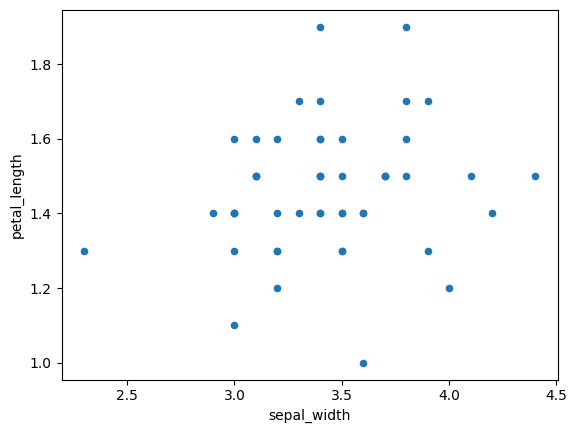

In [248]:
iris_w_index.loc['setosa'].plot.scatter('sepal_width','petal_length')

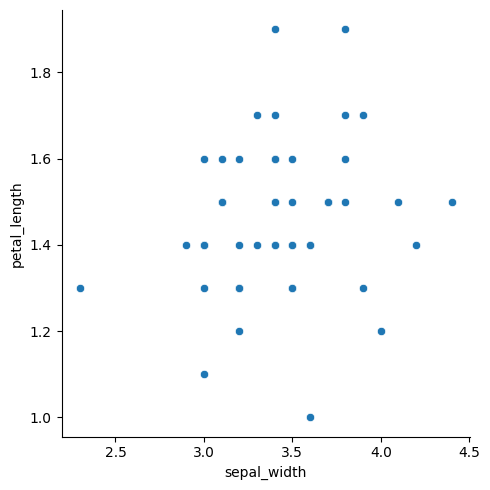

In [251]:
sns.relplot(iris_w_index.loc['setosa'],x='sepal_width',y='petal_length')

# I suppose there are repeating data points, hence explaining why there are less than 40 data points on here.